In [19]:
import networkx as nx
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from fa2 import ForceAtlas2

In [1]:
cities = pd.read_csv('data/Top50/top50cities.csv',delimiter=',')

#import nodes to get id from nodes/hosts
hosts = pd.DataFrame() #creates a new dataframe that's empty
for idx,city in cities.iterrows():#.loc[cities['2017']>50000].iterrows():
    for p in range(1,14):
        if (os.path.exists('data/Top50/hosts/'+city['name']+str(p)+'.csv')):
            df = pd.read_csv('data/Top50/hosts/'+city['name']+str(p)+'.csv',index_col=False)
            hosts = pd.concat([hosts,df]).reset_index(drop=True)
print(len(hosts))
hosts=hosts.drop_duplicates()
print(len(hosts))


rev = pd.DataFrame() #creates a new dataframe that's empty
for idx,city in cities.iterrows():#.loc[cities['2017']>50000].iterrows():
    if os.path.exists('data/Top50//reviews/'+city['name']+'Rev.csv'):
        df = pd.read_csv('data/Top50/reviews/'+city['name']+'Rev.csv',index_col=False)
        rev = pd.concat([rev,df]).reset_index(drop=True)
print(len(rev))
rev=rev.drop_duplicates()
print(len(rev))

def getColorfromCmap(val): 
    cmap = cm.get_cmap('tab20') 
    return cmap(val)

legend_city=[city['name'] for idx,city in cities.iterrows()]
legend_city.append('outside')
legend_col=[getColorfromCmap(idx/(len(legend_city)-1)) for idx,x in enumerate(legend_city)]


#Creating the graph G
G = nx.DiGraph()
links = []
user_id_unique=set(hosts['id'].tolist())
#G.add_nodes_from(user_id_unique)
G.add_nodes_from([(rows['id'],{'city':rows['city']}) for idx,rows in hosts.iterrows()])

G.add_edges_from([(rows['to'],rows['from'])for index,rows in rev[['to','from','relationshipType']].iterrows() if rows['relationshipType']=='host'])
G.add_edges_from([(rows['from'],rows['to'])for index,rows in rev[['to','from','relationshipType']].iterrows() if rows['relationshipType']=='surf'])


10586
10582
96090
96085


In [2]:
#plotting betweenness centrality of network

betweenness_centrality = nx.betweenness_centrality(G, k=1000)
print("\n  Number of nodes with betweenness centrality equal to 0: ",list(betweenness_centrality.values()).count(0.0),"\n\n")

plt.figure(figsize = (22,8))
plt.plot(list(betweenness_centrality.values()),'o') 
plt.title("Distribution of Betweeness Centrality of the CouchSurfing reviews network\n")
plt.xlabel("\n Nodes")
plt.ylabel("Betweeness Centrality \n")
plt.show()


  Number of nodes with betweenness centrality equal to 0:  93282 




In [4]:
node_to_city_dict = dict()
for node in G.nodes(data=True):
    if node[1]:
        if node[0] not in node_to_city_dict:
            node_to_city_dict[node[0]] = node[1]['city']
    else:
        node_to_city_dict[node[0]] = 'outside'
    
    
    
beetweennes_centrality_nodes_by_city = dict()
for key, value in betweenness_centrality.items():
    if value > 0.0 :
        city = node_to_city_dict[key]
        if city not in beetweennes_centrality_nodes_by_city:
            beetweennes_centrality_nodes_by_city[city] = []
        beetweennes_centrality_nodes_by_city[city].append(tuple([key, value]))
        
for key1, value in beetweennes_centrality_nodes_by_city.items():
    value.sort(key=lambda x: x[1], reverse=True)

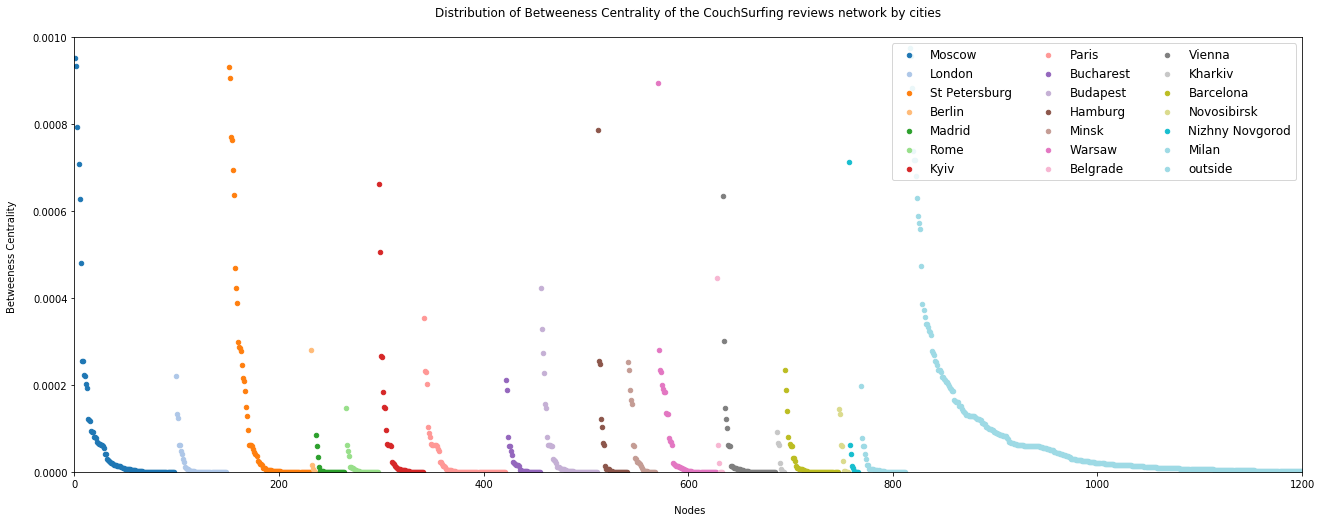

In [9]:
plt.figure(figsize = (22,8))
 
    
scatter_list = []
h = 0
for idx, city in enumerate(legend_city,start=0):
    bc_values = [ el[1] for el in beetweennes_centrality_nodes_by_city[city]]
    scatter_list.append(plt.scatter( range(h, h + len(bc_values)), bc_values , c=legend_col[idx], s=20 )) 
    h = h + len(bc_values)
    
plt.legend(tuple(scatter_list),
           tuple(legend_city),
           scatterpoints=1,
           loc='upper right',
           ncol=2,
           fontsize=12)

out_axes = plt.gca()
out_axes.set_xlim([0,1200])
out_axes.set_ylim([0,0.001])

plt.title("Distribution of Betweeness Centrality of the CouchSurfing reviews network by cities\n")
plt.xlabel("\n Nodes")
plt.ylabel("Betweeness Centrality \n")
#plt.savefig('In-Out degree distribution of CouchSurfing reviews network.png' , dpi = 500)
plt.show()

In [14]:
#create citi_to_color_dict 
citi_to_color_dict = dict()
for idx, city in enumerate(legend_city,start=0):
    citi_to_color_dict[city] = legend_col[idx]
citi_to_color_dict

{'Barcelona': (0.73725490196078436,
  0.74117647058823533,
  0.13333333333333333,
  1.0),
 'Belgrade': (0.96862745098039216,
  0.71372549019607845,
  0.82352941176470584,
  1.0),
 'Berlin': (1.0, 0.73333333333333328, 0.47058823529411764, 1.0),
 'Bucharest': (0.58039215686274515,
  0.40392156862745099,
  0.74117647058823533,
  1.0),
 'Budapest': (0.77254901960784317,
  0.69019607843137254,
  0.83529411764705885,
  1.0),
 'Hamburg': (0.5490196078431373,
  0.33725490196078434,
  0.29411764705882354,
  1.0),
 'Kharkiv': (0.7803921568627451, 0.7803921568627451, 0.7803921568627451, 1.0),
 'Kyiv': (0.83921568627450982, 0.15294117647058825, 0.15686274509803921, 1.0),
 'London': (0.68235294117647061, 0.7803921568627451, 0.90980392156862744, 1.0),
 'Madrid': (0.17254901960784313,
  0.62745098039215685,
  0.17254901960784313,
  1.0),
 'Milan': (0.61960784313725492, 0.85490196078431369, 0.89803921568627454, 1.0),
 'Minsk': (0.7686274509803922, 0.61176470588235299, 0.58039215686274515, 1.0),
 'Mosc

In [30]:
# get relevnt nodes by city:
relevant_nodes = []
for node, bc in betweenness_centrality.items():
    if bc > 0.0:
        relevant_nodes.append((node, bc ))
        
G_bc = nx.Graph(G.subgraph([x[0] for x in relevant_nodes]))
        
color_map_nodes = []
for node in G_bc.nodes(data=True):
    if node[1]:
        color_map_nodes.append(citi_to_color_dict[node[1]['city']])
    else:
        color_map_nodes.append(citi_to_color_dict['outside'])

In [31]:
relevant_edges = []

for u,v in G.edges:
  
  if betweenness_centrality[u] > 0.00 and betweenness_centrality[v] > 0.00:
    relevant_edges.append((u,v))
print(len(relevant_edges))
    
G_bc.add_edges_from( relevant_edges )

1833


In [32]:
forceatlas2 = ForceAtlas2(
                          # Behavior alternatives
                          outboundAttractionDistribution=False,  # Dissuade hubs
                          linLogMode=False,  # NOT IMPLEMENTED
                          adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                          edgeWeightInfluence=0.5,

                          # Performance
                          jitterTolerance=0.2,  # Tolerance
                          barnesHutOptimize=True,
                          barnesHutTheta=0.5,
                          multiThreaded=False,  # NOT IMPLEMENTED

                          # Tuning
                          scalingRatio=6.0,
                          strongGravityMode=False,
                          gravity=0,

                          # Log
                          verbose=False)


positions = forceatlas2.forceatlas2_networkx_layout(G_bc, pos=None, iterations=100)


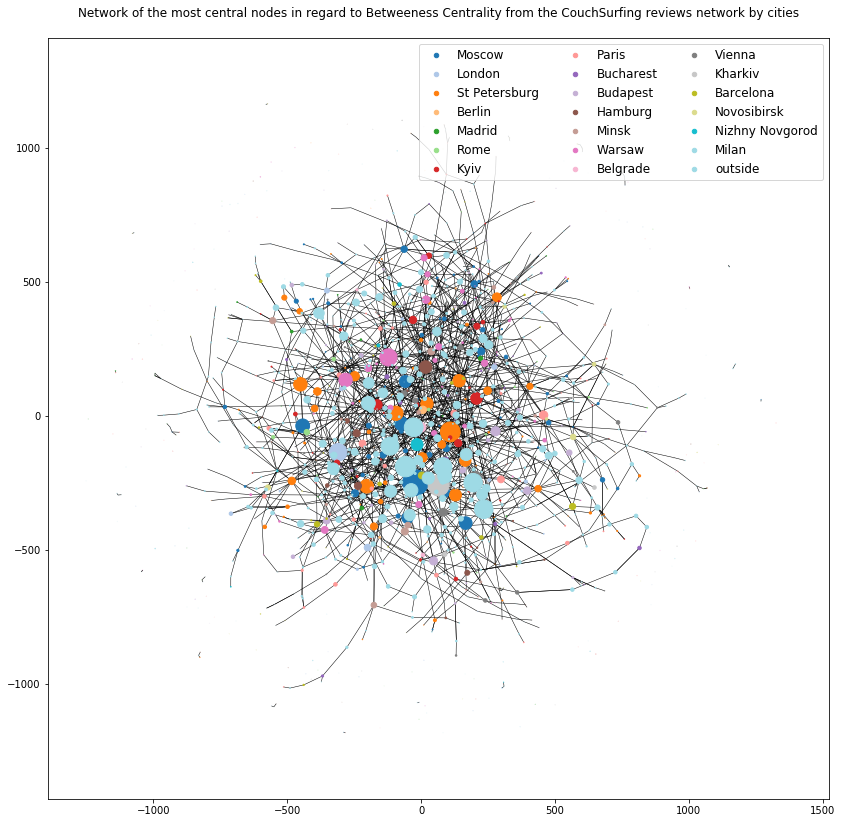

In [47]:
#create edges that connect relevant nodes concercing betweenness centrality

plt.figure(1,figsize=(14,14))

nx.draw_networkx_nodes(G_bc, pos = positions,  node_color = color_map_nodes,node_size=[x[1]* 200000 for x in relevant_nodes], with_labels=True)
nx.draw_networkx_edges(G_bc,positions,edgelist = relevant_edges, edge_color='black', width = 0.5)

plt.legend(tuple(scatter_list),
           tuple(legend_city),
           scatterpoints=1,
           loc='upper right',
           ncol=3,
           fontsize=12)

plt.title("Network of the most central nodes in regard to Betweeness Centrality from the CouchSurfing reviews network by cities\n")

plt.show()

Anallogicly for ec

In [ ]:
comuunity det